# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze restaurant's invoices and tips.

In [2]:
df = sns.load_dataset('tips')

df.head()
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

## 1. Counting numbers of datapoints
---

❓ **On which day of the week there are more people going to the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order
- Don't use rainbow colors

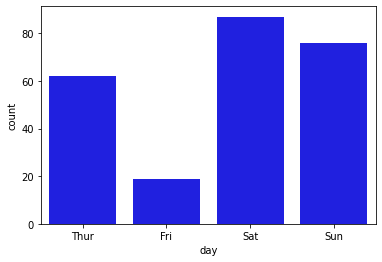

In [3]:
sns.countplot(x="day", data=df, color = 'blue');


---

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

<AxesSubplot:xlabel='day', ylabel='count'>

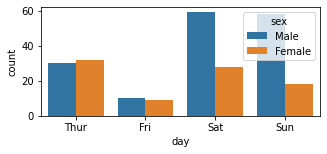

In [4]:
plt.subplots(1, 1, figsize=(5, 2))
sns.countplot(x="day", hue='sex', data=df)

## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seasborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


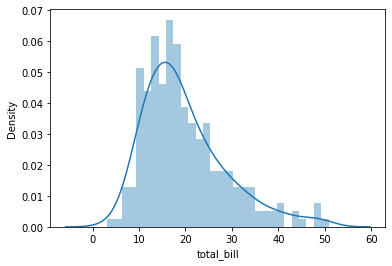

In [8]:
sns.distplot(df['total_bill'], bins = 30)
plt.show()

### 2.1 Multiple distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots(`"bar"`, `"box"`, `"violin"`, `"boxen"`)

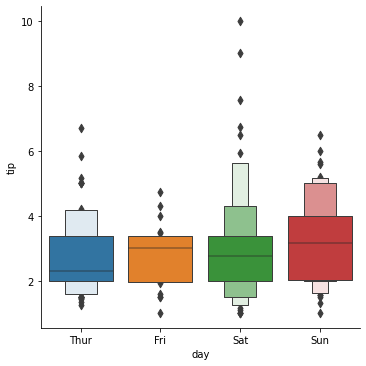

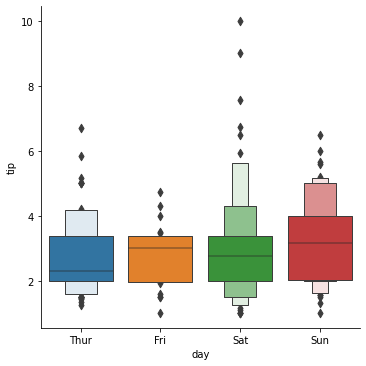

In [17]:
sns.catplot(x = df['day'],y = df['tip'], data = df, kind = 'boxen');


### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` in the with another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

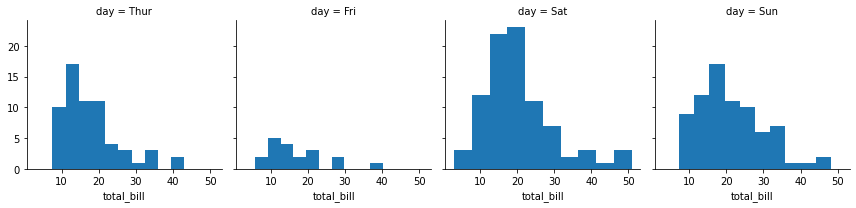

In [22]:
g = sns.FacetGrid(df, col="day")
g.map(plt.hist, 'total_bill');

---
❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

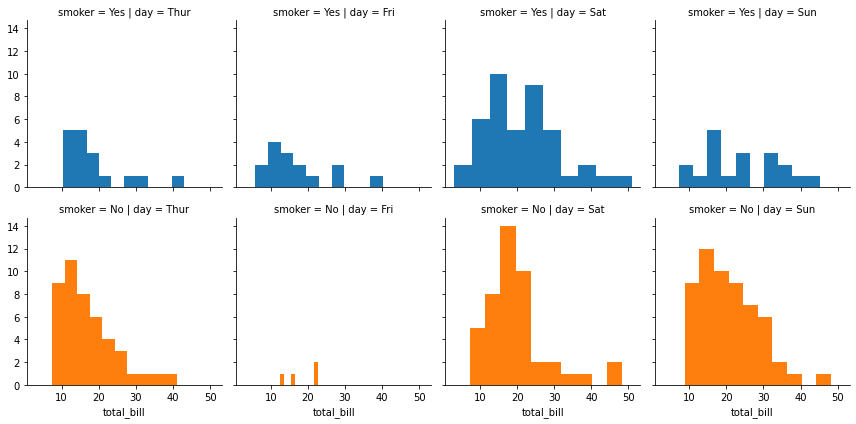

In [24]:
g = sns.FacetGrid(df, col="day", row="smoker", hue="smoker")
g.map(plt.hist, 'total_bill');


## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

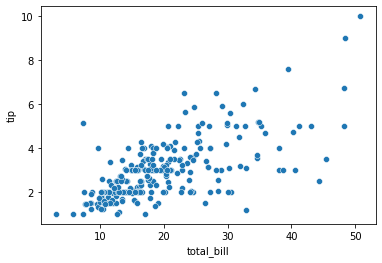

In [26]:
sns.scatterplot(x="total_bill", y="tip", data=df)

---
❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

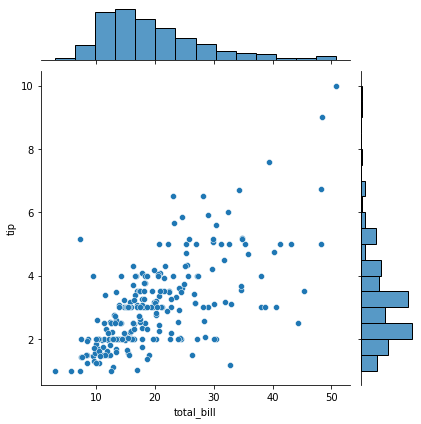

In [29]:
sns.jointplot(x="total_bill", y="tip", data=df)


❓ Let's now compute a simple linear regression curve using `sns.regplot()`

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

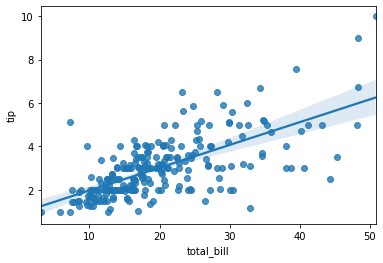

In [30]:
sns.regplot(x="total_bill", y="tip", data=df)


❓Now, try also to use a `FaceGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

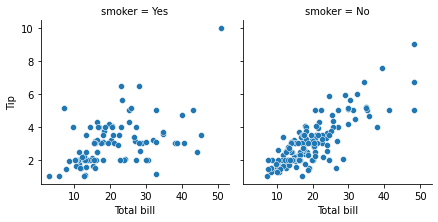

In [35]:
g = sns.FacetGrid(df, col="smoker")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip");

## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

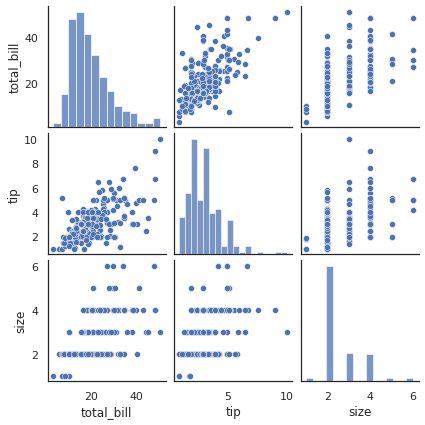

In [36]:
sns.set(style='white')
sns.pairplot(df, height=2)
plt.show()
